In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load Dataset and Analyze

In [2]:
df =pd.read_csv('spam_final.csv',header=None,names=["label","message"],engine="python")

In [3]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [5]:
df.shape

(5572, 2)

In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Balance Dataset

In [7]:
ham=df[df['label']=="ham"]
ham.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [8]:
spam=df[df['label']=="spam"]
spam.head()

,label,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [9]:
ham.shape

(4825, 2)

In [10]:
spam.shape

(747, 2)

In [11]:
ham = ham.sample(spam.shape[0])

In [12]:
ham.shape, spam.shape

((747, 2), (747, 2))

In [13]:
data = ham.append(spam, ignore_index=True)

In [14]:
data.sample(5)

,label,message
155,ham,"New Theory: Argument wins d SITUATION, but los..."
926,spam,Sex up ur mobile with a FREE sexy pic of Jorda...
790,spam,T-Mobile customer you may now claim your FREE ...
1020,spam,WELL DONE! Your 4* Costa Del Sol Holiday or Ã¥...
681,ham,Havent still waitin as usual... ÃŒÃ� come back...


In [15]:
data.shape

(1494, 2)

In [16]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

### EDA

In [21]:
data['char_length']=data['message'].apply(lambda x : len(str(x)))

In [24]:
ham = data[data['label']=='ham']
spam = data[data['label']=='spam']

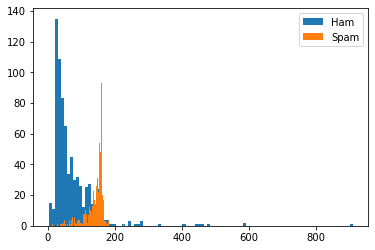

In [29]:
plt.hist(ham['char_length'],bins=100,alpha=1,label='Ham')
plt.hist(spam['char_length'],bins=100,alpha=1,label='Spam')
plt.legend()
plt.show()

### Data Prepraparation for Training

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
data.head()

,label,message,char_length
0,ham,Can you talk with me..,22
1,ham,"I know you are thinkin malaria. But relax, chi...",329
2,ham,Jos ask if u wana meet up?,26
3,ham,No message..no responce..what happend?,38
4,ham,So the sun is anti sleep medicine.,34


In [35]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(data['message'])

In [36]:
x

<1494x4555 sparse matrix of type '<class 'numpy.float64'>'
	with 25226 stored elements in Compressed Sparse Row format>

In [37]:
x = x.toarray()

In [38]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
x.shape

(1494, 4555)

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,data['label'],test_size=0.2,random_state=23,stratify=data['label'])

In [44]:
x_train.shape, x_test.shape

((1195, 4555), (299, 4555))

### Model

### Randomforestclassifier

In [45]:
clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [46]:
clf.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [47]:
y_pred = clf.predict(x_test)

In [48]:
accuracy_score(y_test,y_pred)

0.9531772575250836

In [49]:
confusion_matrix(y_test,y_pred)

array([[149,   0],
       [ 14, 136]], dtype=int64)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.96       149
        spam       1.00      0.91      0.95       150

    accuracy                           0.95       299
   macro avg       0.96      0.95      0.95       299
weighted avg       0.96      0.95      0.95       299



### SVM

In [52]:
clf = SVC(C=1000,gamma='auto')

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print(accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

0.9565217391304348
[[149   0]
 [ 13 137]]
              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       149
        spam       1.00      0.91      0.95       150

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



In [53]:
def predict(x):
    x = tfidf.transform([str(x)])
    x = x.toarray()
    print(clf.predict(x))

In [56]:
predict("1lakh cash prize")

['spam']
